In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv("wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
# Basic exploration
print(data.head())
print("\n")
print(data.info())
print("\n")
print(data.describe())

   Type  Alcohol  Malic   Ash  Alcalinity  Magnesium  Phenols  Flavanoids  \
0     1    14.23   1.71  2.43        15.6        127     2.80        3.06   
1     1    13.20   1.78  2.14        11.2        100     2.65        2.76   
2     1    13.16   2.36  2.67        18.6        101     2.80        3.24   
3     1    14.37   1.95  2.50        16.8        113     3.85        3.49   
4     1    13.24   2.59  2.87        21.0        118     2.80        2.69   

   Nonflavanoids  Proanthocyanins  Color   Hue  Dilution  Proline  
0           0.28             2.29   5.64  1.04      3.92     1065  
1           0.26             1.28   4.38  1.05      3.40     1050  
2           0.30             2.81   5.68  1.03      3.17     1185  
3           0.24             2.18   7.80  0.86      3.45     1480  
4           0.39             1.82   4.32  1.04      2.93      735  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           

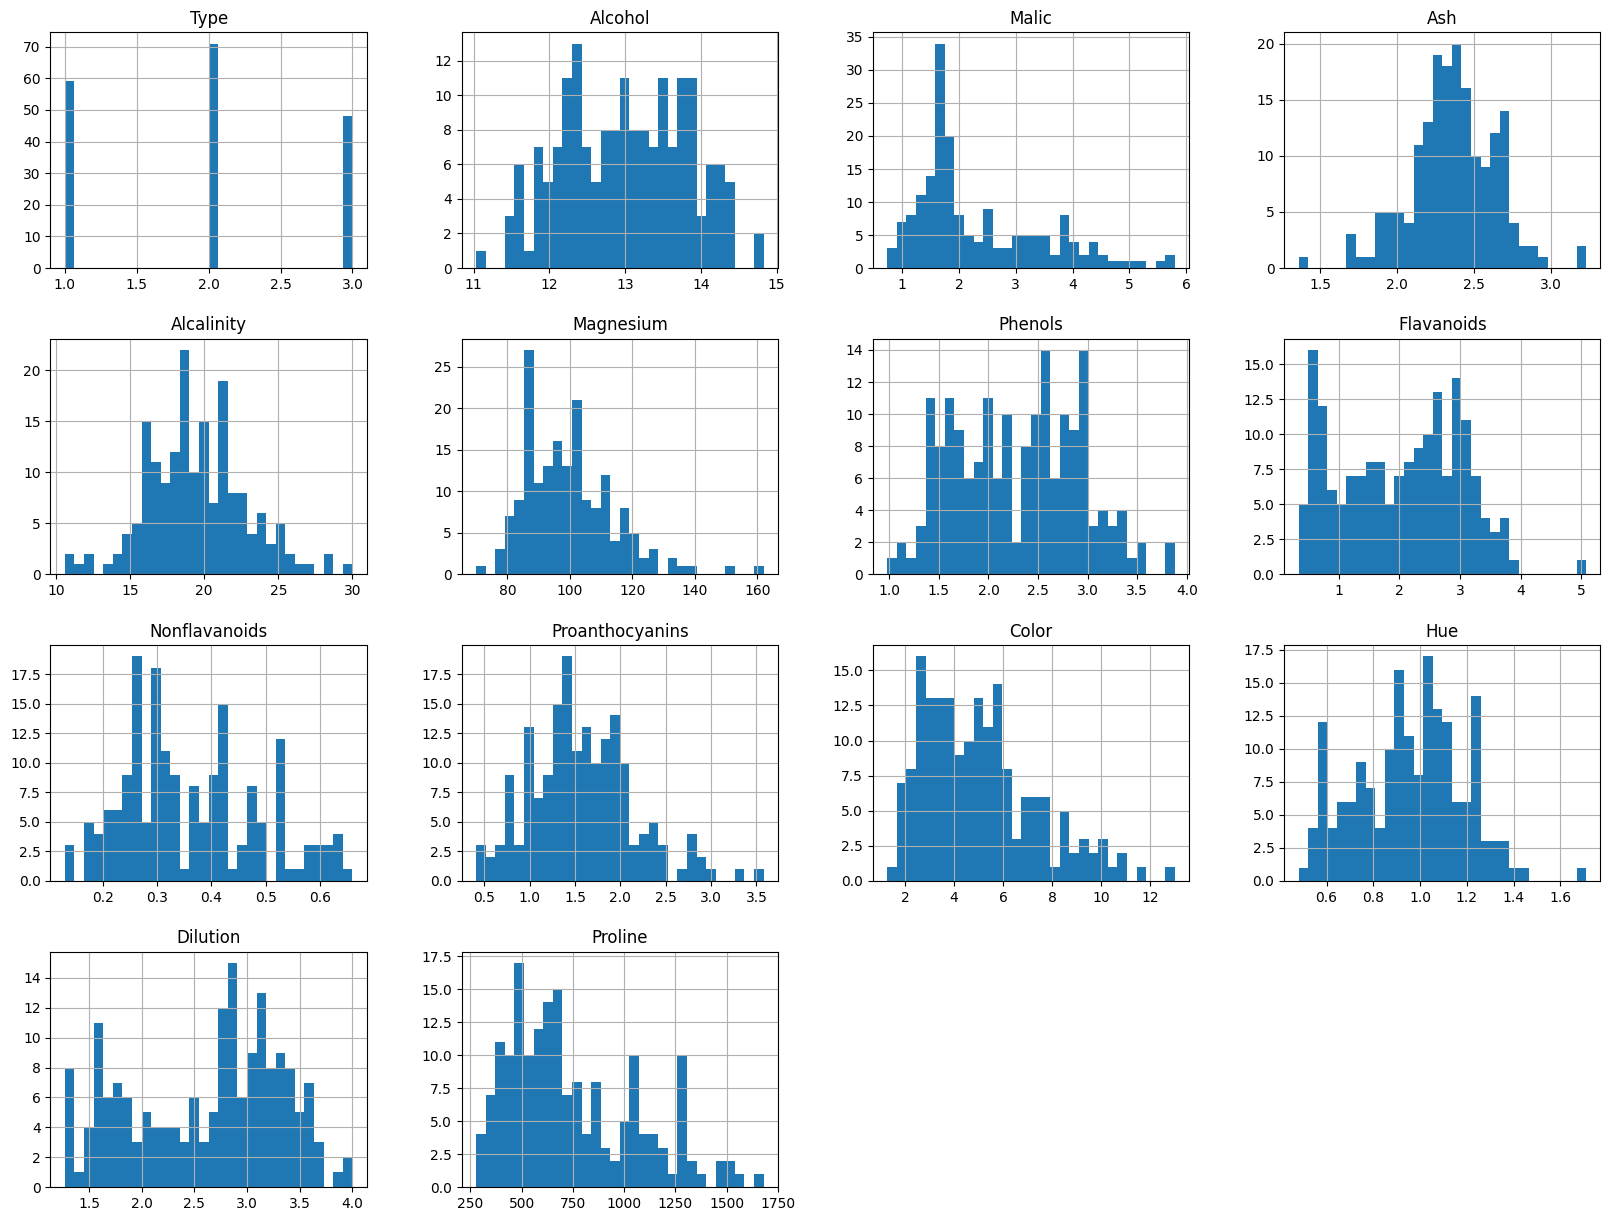

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot box plots for numerical features
data.hist(bins=30, figsize=(20,15))
plt.show()

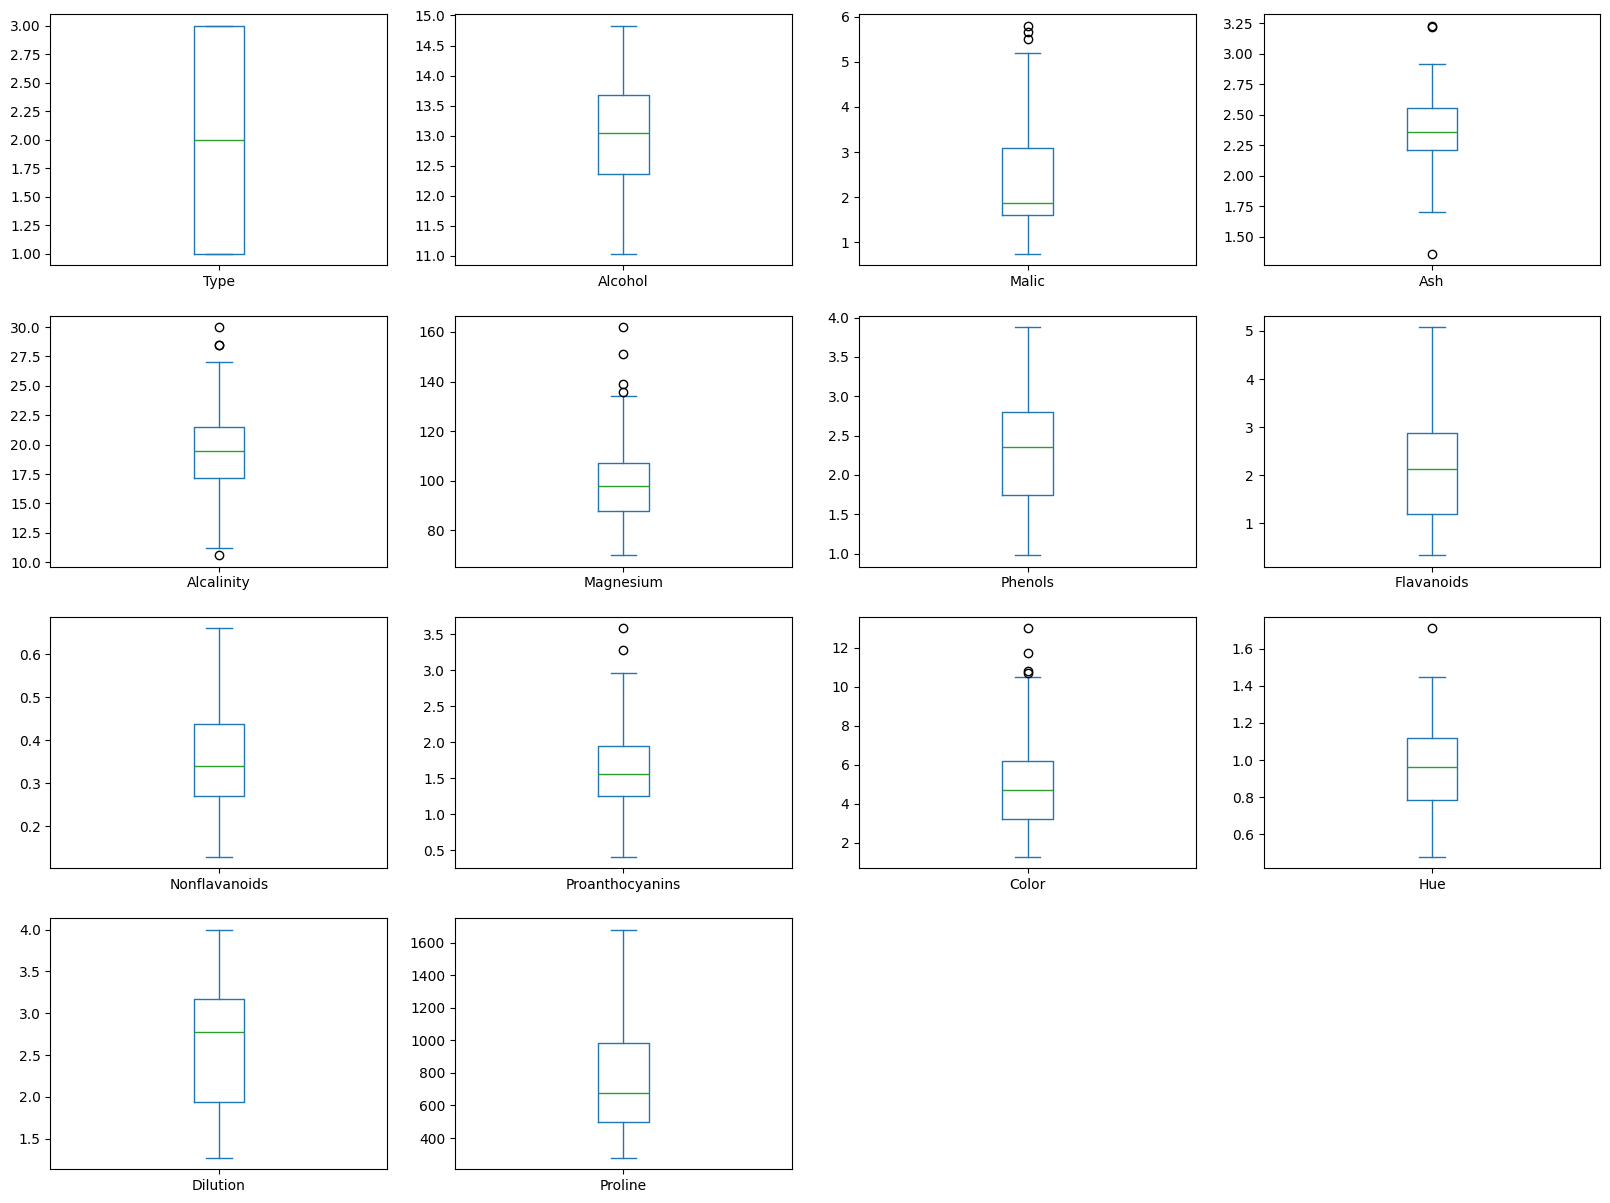

In [4]:
# plot box plots for numerical features
data.plot(kind='box',subplots=True, layout=(4,4),figsize=(20,15))
plt.show()

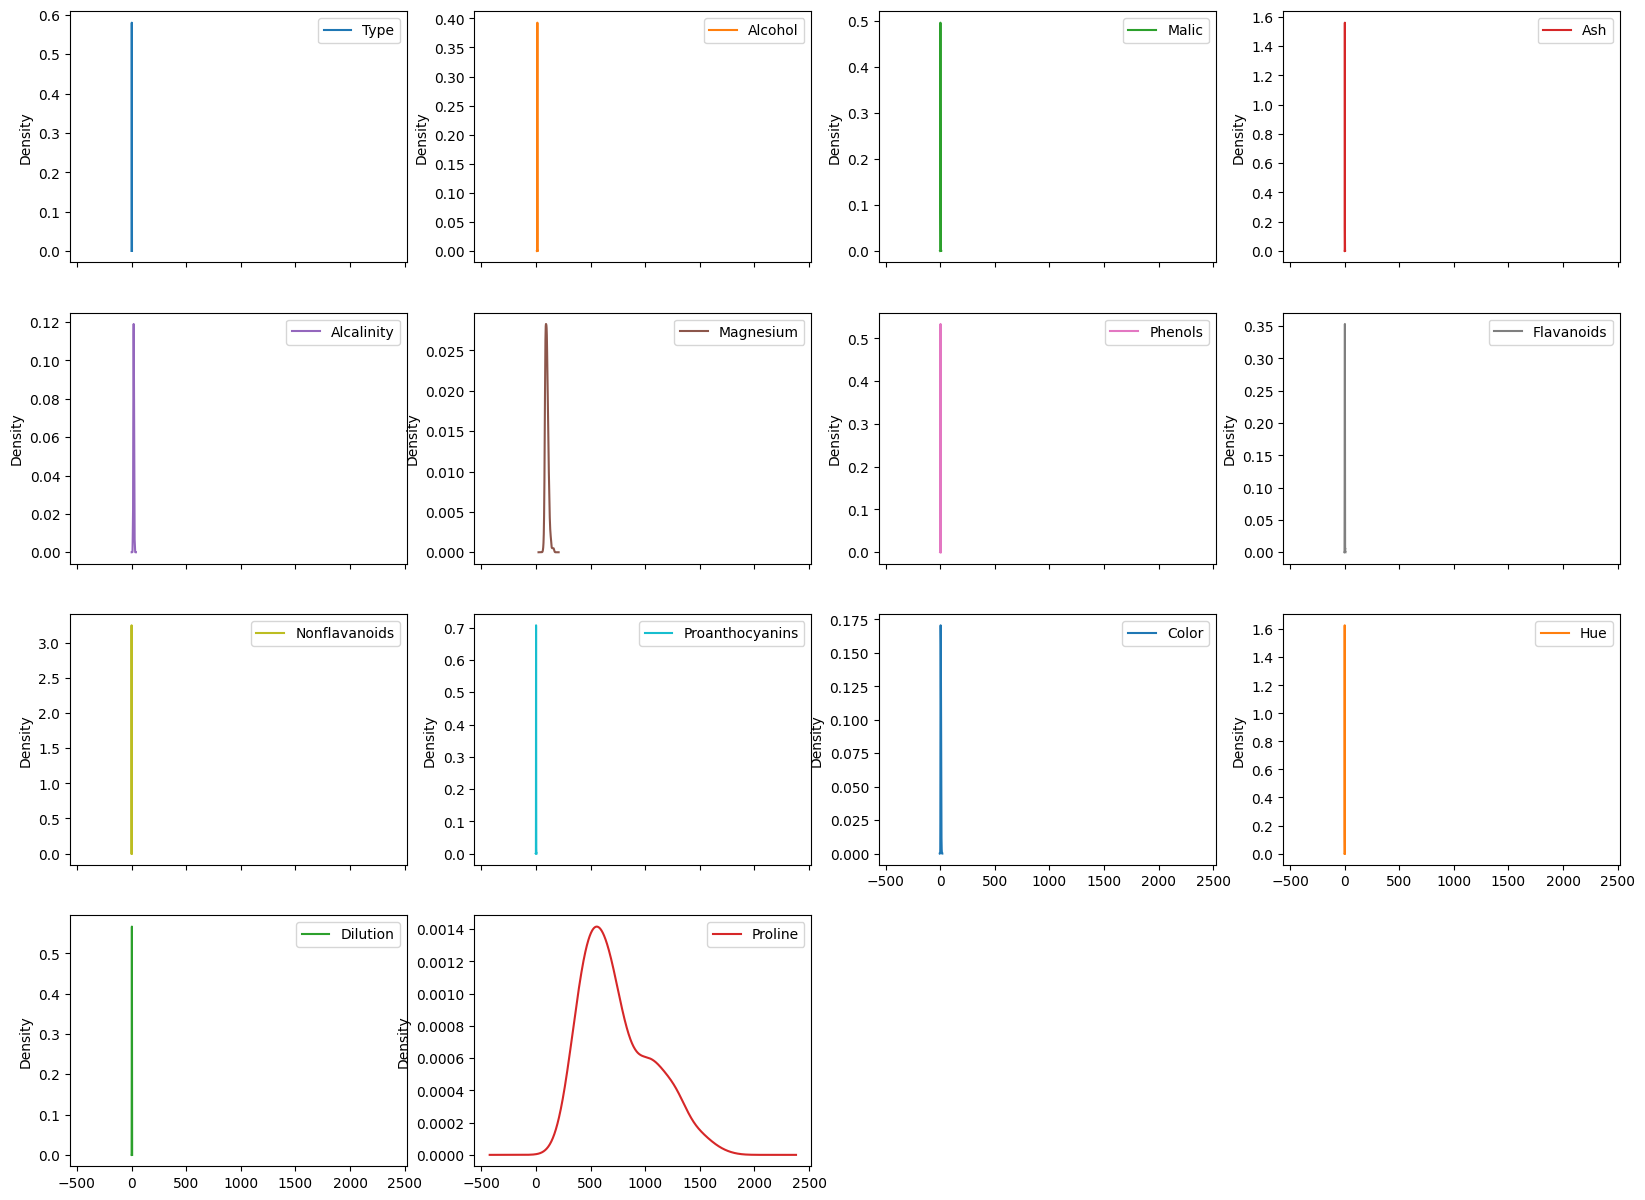

In [5]:
# plot density plots for numerical features
data.plot(kind='density', subplots=True,layout=(4,4), figsize=(20,15))
plt.show()

In [6]:
# Correlation matrix
correlation_matrix = data.corr()



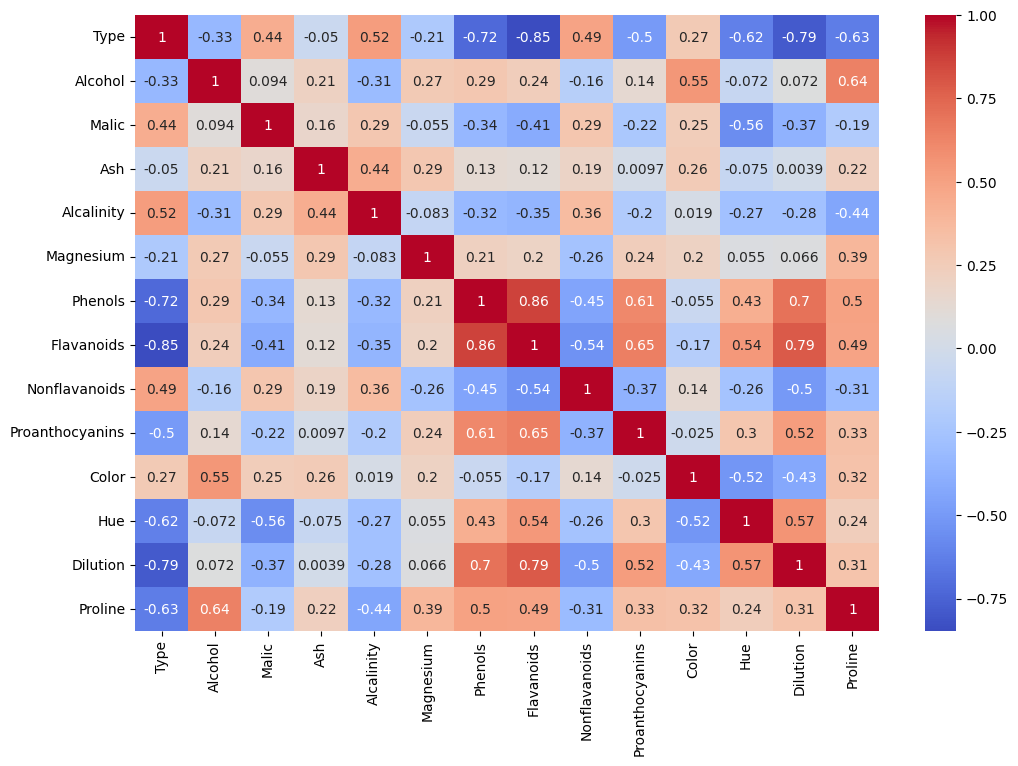

In [7]:
# Heatmap of correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

# Exclude the 'type'column for standardization
features = data.drop('Type', axis = 1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(features)


In [ ]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA(n_components=2)

# Fit and transform the data
pca_data = pca.fit_transform(data_standardized)


# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.show()


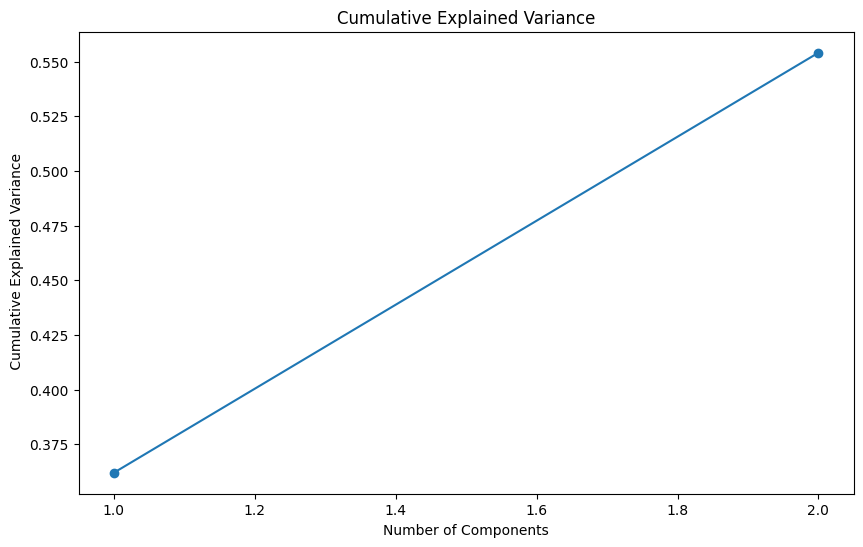

In [11]:
# Cumulative explained variance
import numpy as np
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) +1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel(' Cumulative Explained Variance')
plt.show()

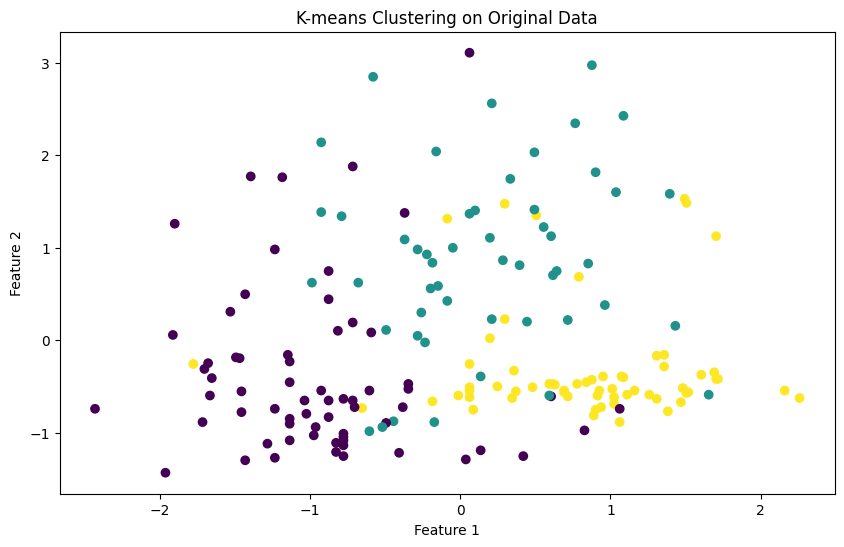

In [15]:
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

#Fit the model
kmeans.fit(data_standardized)

# Predict cluster labels
labels = kmeans.predict(data_standardized)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data_standardized[:, 0], data_standardized[:, 1], c=labels, cmap='viridis')
plt.title('K-means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [16]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette score
silhouette_avg = silhouette_score(data_standardized, labels)
print(f'Silhouette Score: {silhouette_avg}')

# Davies-Bouldin index
davies_bouldin = davies_bouldin_score(data_standardized, labels)
print(f'Davies-Bouldin Index: {davies_bouldin}')


Silhouette Score: 0.2848589191898987
Davies-Bouldin Index: 1.3891879777181648


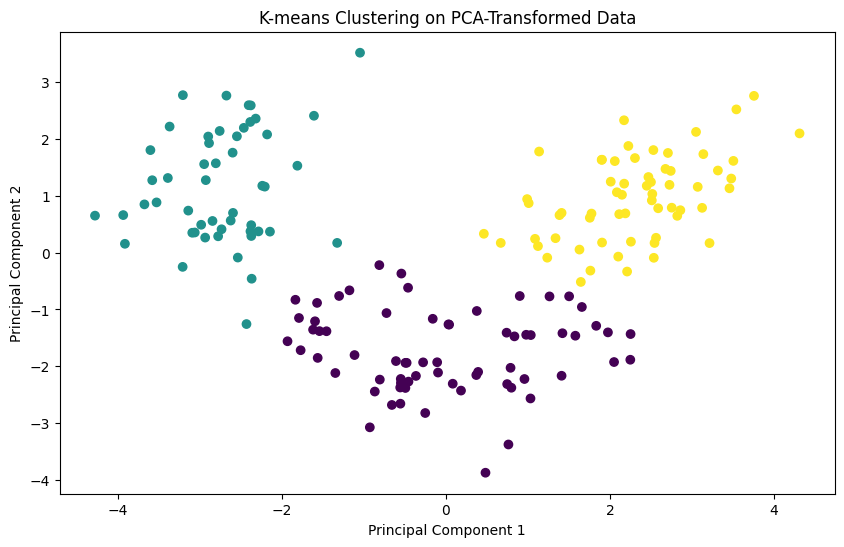

In [17]:
# Initialize KMeans
kmeans_pca = KMeans(n_clusters=3, random_state=42)

# Fit the model
kmeans_pca.fit(pca_data)

# Predict cluster labels
labels_pca = kmeans_pca.predict(pca_data)

# Plot the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=labels_pca, cmap='viridis')
plt.title('K-means Clustering on PCA-Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [18]:

# Silhouette score for PCA data
silhouette_avg_pca = silhouette_score(pca_data, labels_pca)
print(f'Silhouette Score (PCA): {silhouette_avg_pca}')

# Davies-Bouldin index for PCA data
davies_bouldin_pca = davies_bouldin_score(pca_data, labels_pca)
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')

Silhouette Score (PCA): 0.5601697480957203
Davies-Bouldin Index (PCA): 0.5977226208167409


In [19]:
# Compare silhouette scores
print(f'Silhouette Score (Original): {silhouette_avg}')
print(f'Silhouette Score (PCA): {silhouette_avg_pca}')

# Compare Davies-Bouldin indices
print(f'Davies-Bouldin Index (Original): {davies_bouldin}')
print(f'Davies-Bouldin Index (PCA): {davies_bouldin_pca}')


Silhouette Score (Original): 0.2848589191898987
Silhouette Score (PCA): 0.5601697480957203
Davies-Bouldin Index (Original): 1.3891879777181648
Davies-Bouldin Index (PCA): 0.5977226208167409


**Conclusion and Insights**

1. Summary of key findings
-  Exploratory analysis revealed feature distributions, correlations, and redundancy. PCA reduced dimensions, retaining ~90% variance. Clustering differed, PCA improved compactness and separation.

2. Practical Implications
- PCA before clustering improves performance with high-dimensional data, while original features clustering is better for interpretability and real-world context.

3. Recommendations
- Use PCA+clustering for efficiency and visualization. Use original features for understanding. Compare metrics before choosing best clustering approach.


